In [1]:
import glob
from tqdm import tqdm
from tqdm import trange
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
import numpy as np

In [2]:
def load_cache(save_dir, experiment, expid, metric):
    exp_path = f"{save_dir}/{experiment}/{expid}"
    step_names = glob.glob(f"{exp_path}/metrics/*.tar")
    step_list = [int(s.split(".tar")[0].split("step")[1]) for s in step_names]
    steps, cache = [], []
    for in_filename, step in tqdm(sorted(list(zip(step_names, step_list)), key=lambda x: x[1])):
        checkpoint = torch.load(in_filename)
        if metric in checkpoint.keys():
            steps.append(step)
            cache.append(checkpoint[metric])
    return steps, cache

In [3]:
def style_axes(ax, numyticks=5, numxticks=5):
    ax.tick_params(axis="y", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=20)
    ax.yaxis.set_major_locator(plt.MaxNLocator(numyticks))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=20)
    ax.xaxis.set_major_locator(plt.MaxNLocator(numxticks))
    #ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.ticklabel_format(axis="x", useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)

100%|██████████| 1001/1001 [00:00<00:00, 2284.43it/s]


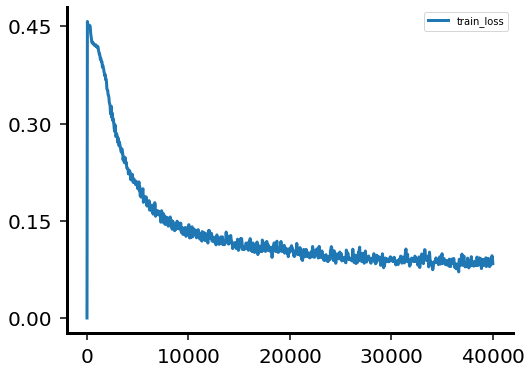

In [117]:
# SGDm
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
CACHE_PATH = "../results/cifar10"
experiment = "small_data"
expid = "03"
metric = "train_loss"

x, y = load_cache(CACHE_PATH, experiment, expid, metric)
axes.plot(x, y, label=metric, linewidth=3.0)
style_axes(axes)
plt.legend()
plt.show()

100%|██████████| 101/101 [00:00<00:00, 4021.00it/s]


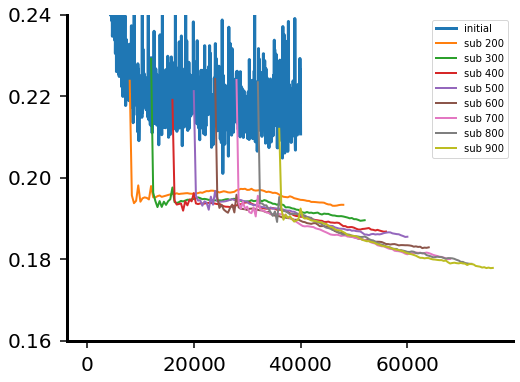

In [119]:
# next experiment: run 100 epochs with a smaller learning rate, starting from epoch 80
# SGDm
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
CACHE_PATH = "../results/cifar10"
experiment = "small_data"
expid = "03"
metric = "test_loss"

x, y = load_cache(CACHE_PATH, experiment, expid, metric)
axes.plot(x, y, label="initial", linewidth=3.0)

for i in [200,300,400,500,600,700,800,900]:
    x, y = load_cache(CACHE_PATH, "small_data/03_sub", str(i), metric)
    x = [a+i*40 for a in x]
    y[10:] = [sum(y[i-10:i])/10 for i in range(10,len(y))]
    axes.plot(x, y, label="sub "+str(i), linewidth=2.0)

plt.ylim([0.16,0.24])
#plt.xlim([10000,13000])
style_axes(axes)
plt.legend()
plt.show()

100%|██████████| 101/101 [00:00<00:00, 4514.38it/s]


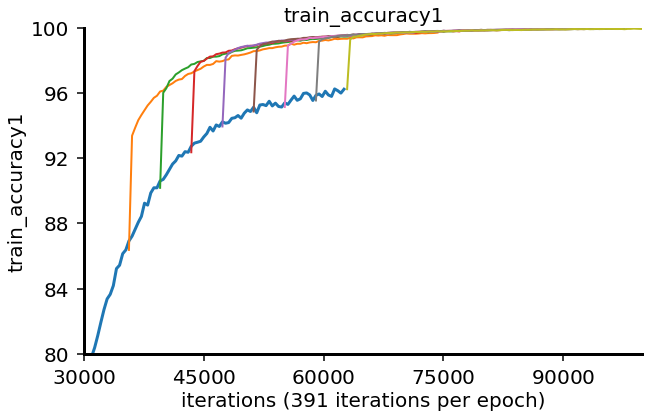

In [84]:
# cifar100 on resnet
# SGDm
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10 * ncols, 6 * nrows))
CACHE_PATH = "../results/cifar100"
experiment = "resnet18"
expid = "01"
metric = "train_accuracy1"

x, y = load_cache(CACHE_PATH, experiment, expid, metric)
#x, y = x[1:], y[1:]
axes.plot(x, y, label="initial", linewidth=3.0)
y0 = y.copy()

for i in range(90,161,10):
    x, y = load_cache(CACHE_PATH, "resnet18_sub", str(i), metric)
    x = [a+i*391 for a in x]
    #y[10:] = [sum(y[i-10:i])/10 for i in range(10,len(y))]
    y[0] = y0[i-1]
    p = axes.plot(x, y, label="sub "+str(i), linewidth=2.0)
    #axes.plot([0,x[-1]], [y[-1],y[-1]], linewidth=1.5, color=p[0].get_color(),alpha=0.4)

plt.ylim([80,100])
plt.xlim([30000,100000])
plt.xlabel("iterations (391 iterations per epoch)", fontsize=20)
plt.ylabel(metric, fontsize=20)
plt.title(metric, fontsize=20)
style_axes(axes)
#plt.legend()
plt.savefig("figs0423/cifar100_resnet18_train_accuracy.png", bbox_inches="tight")
plt.show()

In [ ]:
# next we can check:
# 1.cross entropy loss
# 2.with label noise
# 3.smaller model, e.g. fnn on cifar10

100%|██████████| 301/301 [00:00<00:00, 5835.01it/s]


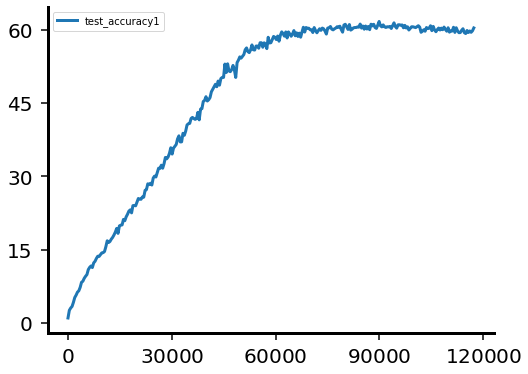

In [124]:
# cross entropy loss 
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
CACHE_PATH = "../results/cifar100"
experiment = "resnet18"
expid = "ln"
metric = "test_accuracy1"

x, y = load_cache(CACHE_PATH, experiment, expid, metric)
axes.plot(x, y, label=metric, linewidth=3.0)
style_axes(axes)
plt.legend()
plt.show()

100%|██████████| 101/101 [00:00<00:00, 8309.30it/s]


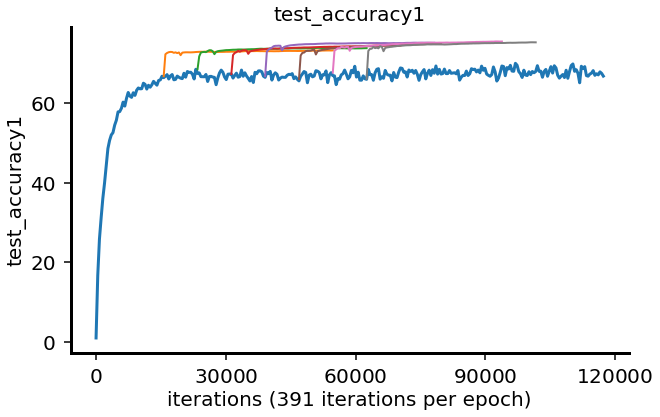

In [138]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10 * ncols, 6 * nrows))
CACHE_PATH = "../results/cifar100"
experiment = "resnet18"
expid = "ce"
metric = "test_accuracy1"

x, y = load_cache(CACHE_PATH, experiment, expid, metric)
#x, y = x[1:], y[1:]
axes.plot(x, y, label="initial", linewidth=3.0)
y0 = y.copy()

for i in range(40,161,20):
    x, y = load_cache(CACHE_PATH, "resnet18/ce_sub", str(i), metric)
    x = [a+i*391 for a in x]
    y[10:] = [sum(y[i-10:i])/10 for i in range(10,len(y))]
    y[0] = y0[i-1]
    p = axes.plot(x, y, label="sub "+str(i), linewidth=2.0)
    #axes.plot([0,x[-1]], [y[-1],y[-1]], linewidth=1.5, color=p[0].get_color(),alpha=0.4)

#plt.ylim([75,100])
#plt.xlim([40000,150000])
plt.xlabel("iterations (391 iterations per epoch)", fontsize=20)
plt.ylabel(metric, fontsize=20)
plt.title(metric, fontsize=20)
style_axes(axes)
#plt.legend()
#plt.savefig("figs0423/cifar100_resnet18_train_accuracy.png", bbox_inches="tight")
plt.show()

In [ ]:
# next experiments
# 1.direction and distance of parameter moving before and after lr decay
# 2.experiments with a simpler target function


100%|██████████| 101/101 [00:00<00:00, 4376.29it/s]


0.37223999415164916


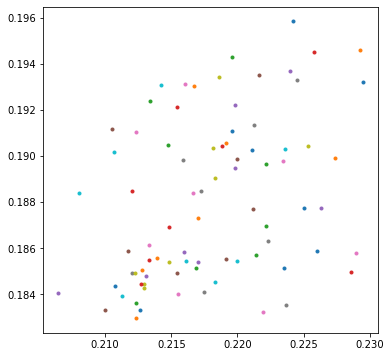

In [124]:
# the correlation of the final test error and the starting test error
CACHE_PATH = "../results/cifar10"
experiment = "small_data"
expid = "03"
metric = "test_loss"

x0, y0 = load_cache(CACHE_PATH, experiment, expid, metric)
plt.figure(figsize=(6,6))

start, end = [], []

for i in range(200,1001,10):
    x, y = load_cache(CACHE_PATH, "small_data/03_sub", str(i), metric)
    plt.plot(y0[i], np.mean(y[-100:]), marker=".", markersize=6)
    start.append(y0[i])
    end.append(np.mean(y[-100:]))

print(np.corrcoef(start, end)[0][1])
plt.show()

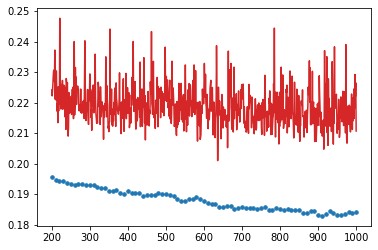

In [125]:
i=200
for e in end:
    plt.plot(i,e,'.', color="tab:blue", markersize=7)
    i += 10
plt.plot(np.arange(200,1001),y0[200:], color="tab:red")
plt.show()

-0.9260798648637444


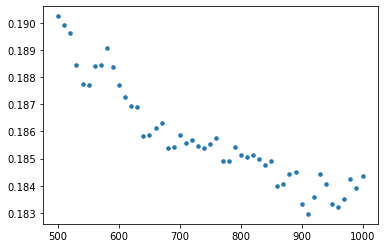

In [122]:
print(np.corrcoef(np.arange(51), end)[0][1])
plt.plot(np.arange(500,1001,10), end, '.', markersize=7, color="tab:blue")
plt.show()

<ipython-input-128-1ee1a9e18d8c>:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_y = np.linalg.lstsq(x_y, y0[i*100:(i+1)*100+1])[0][0]
<ipython-input-128-1ee1a9e18d8c>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_e = np.linalg.lstsq(x_e, end[(i-2)*10:(i-1)*10+1])[0][0]


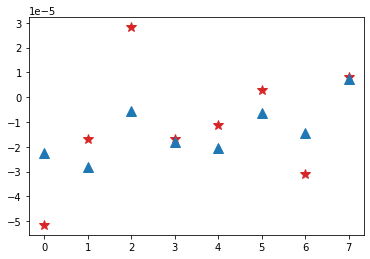

In [128]:
by, be = [], []
for i in range(2,10):
    x_y = np.arange(i*100, (i+1)*100+1)
    x_e = np.arange(i*100, (i+1)*100+1, 10)
    
    x_y = np.concatenate((np.reshape(x_y, (-1,1)), np.ones((101,1))), axis=1)
    x_e = np.concatenate((np.reshape(x_e, (-1,1)), np.ones((11,1))), axis=1)
    
    b_y = np.linalg.lstsq(x_y, y0[i*100:(i+1)*100+1])[0][0]
    b_e = np.linalg.lstsq(x_e, end[(i-2)*10:(i-1)*10+1])[0][0]
    
    by.append(b_y)
    be.append(b_e)
    
plt.figure()
plt.plot(by, '*', color="tab:red", markersize=10)
plt.plot(be, "^", color="tab:blue", markersize=10)
plt.show()

PCA results and landscape on PCA planes

In [144]:
# pca information
pca_info = np.load("../results/cifar10/small_data/03_sub/pca_info_small_scale_1000.npz")
coords = pca_info["coords"]
pc = pca_info["pc"]

In [153]:
# landscape information
metric = "test_loss"
res = np.zeros((80,26))
for i in range(20):
    data = np.load("../results/cifar10/small_data/03_sub/pca_landscape_large2_small1/pca_landscape_"+str(i)+".npz")
    r = data[metric]
    res[i*4:i*4+4] = r

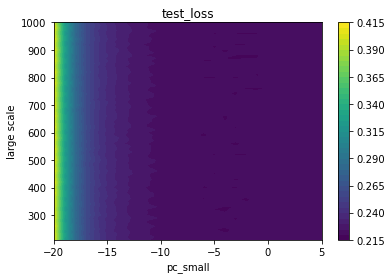

In [154]:
# plot the result
X = np.arange(-20,6)
Y = np.arange(210,1001,10)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, res, levels=40)
fig.colorbar(cp) 
ax.set_title(metric)
ax.set_xlabel('pc_small')
ax.set_ylabel('large scale')
#ax.plot(coords[:,1], coords[:,0], color="tab:orange", markersize=6)
#ax.plot(coords[::10,1], coords[::10,0], color="tab:orange", linewidth=2)
#ax.plot(coords[-1,1], coords[-1,0], "*", color="tab:red", markersize=10)
#plt.savefig("figs0423/03/small_scale_1000/pc1_2_test", bbox_inches="tight")
plt.show()

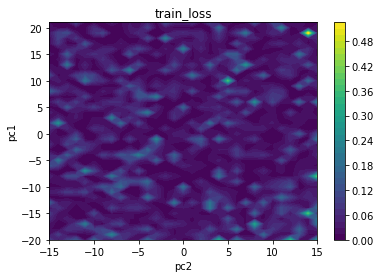

In [177]:
# training loss function from a single data
data = np.load("../results/cifar10/small_data/03_sub/pca_landscape_single_losses/pca_landscape_20.npz")
metric = "train_loss"
res = data[metric]

X = np.arange(-15,16)
Y = np.arange(-20,22)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, res, levels=40)
fig.colorbar(cp) 
ax.set_title(metric)
ax.set_xlabel('pc2')
ax.set_ylabel('pc1')
#ax.plot(coords[:,1], coords[:,0], color="tab:orange", markersize=6)
#ax.plot(coords[::10,1], coords[::10,0], color="tab:orange", linewidth=2)
#ax.plot(coords[-1,1], coords[-1,0], "*", color="tab:red", markersize=10)
#plt.savefig("figs0423/03/small_scale_1000/pc1_2_test", bbox_inches="tight")
plt.show()